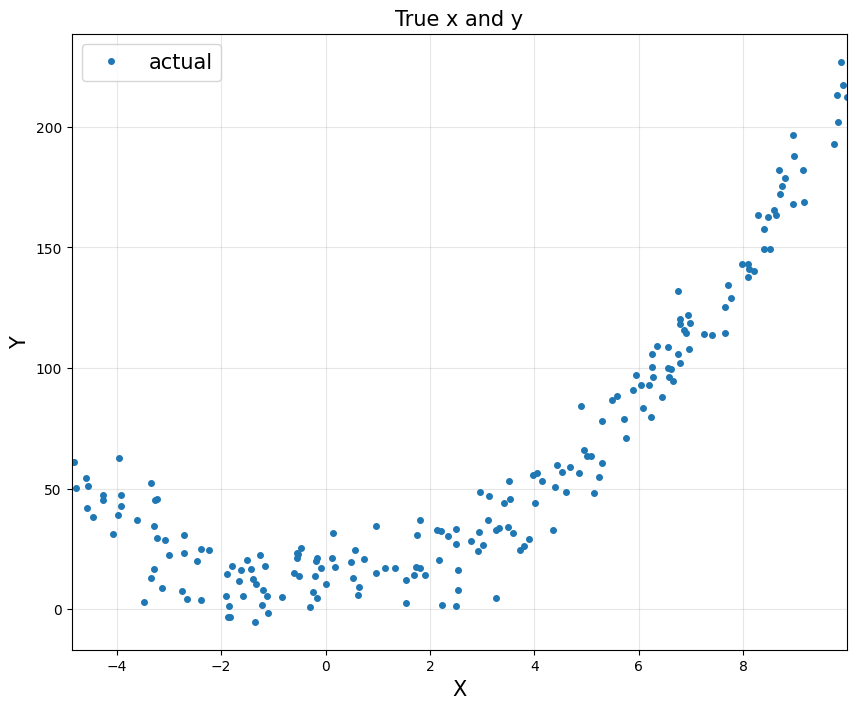

In [26]:
import numpy as np
import matplotlib.pyplot as plt

n = 200
x = -5 + 15*np.random.rand(n, 1)
noise = 10*np.random.randn(n, 1)

y = 10 + 1*x + 2*x**2 + noise

plt.figure(figsize = (10, 8))

plt.title('True x and y', fontsize = 15)
plt.xlabel('X', fontsize = 15)
plt.ylabel('Y', fontsize = 15)
plt.plot(x, y, 'o', markersize=4, label = 'actual')
plt.xlim([np.min(x), np.max(x)])
plt.grid(alpha = 0.3)
plt.legend(fontsize = 15)

plt.show()

In [27]:
x_train, x_test = (x[:-int(n*0.2)] + 5) / 15, x[-int(n*0.2):]
y_train, y_test = y[:-int(n*0.2)] / 200, y[-int(n*0.2):]

print(x_train.shape)

(160, 1)


In [28]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense, LeakyReLU
from tensorflow.keras.optimizers import SGD, Adam


model1 = Sequential()

model1.add(Flatten(input_shape=(1,)))
model1.add(Dense(1, activation = 'linear'))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [29]:
model1.compile(optimizer = Adam(learning_rate=1e-3), loss = 'mse')
model1.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_3 (Flatten)             │ (None, 1)              │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (None, 1)              │             2 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2 (8.00 B)

 Trainable params: 2 (8.00 B)

 Non-trainable params: 0 (0.00 B)

In [30]:
history1 = model1.fit(x_train, y_train, batch_size = 20, epochs= 200, verbose = 1)

Epoch 1/200
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 1.0843  
Epoch 2/200
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 1.0881 
Epoch 3/200
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 1.1206 
Epoch 4/200
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 1.1664 
Epoch 5/200
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 1.0243 
Epoch 6/200
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.9057 
Epoch 7/200
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.9094 
Epoch 8/200
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.9611 
Epoch 9/200
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.9415 
Epoch 10/200
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.8890 
Epoch 11/200
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.8254 
Epoch 12/200
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.9680 
Epoch 13/200
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.9171 
Epoch 14/200
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.7091 
Epoch 15/200
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.7505 
Epoch 16/200
8/8 ━

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step


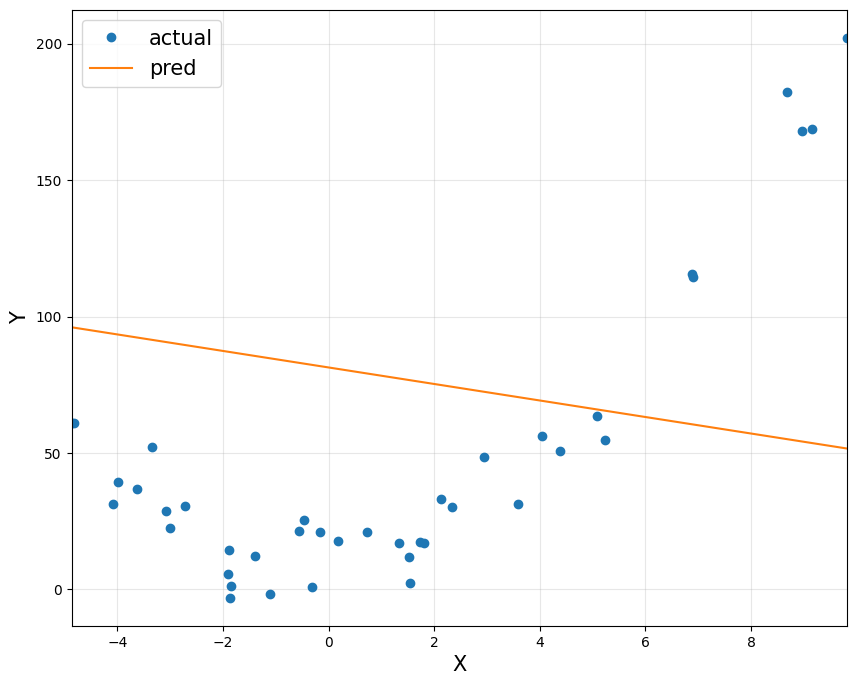

In [31]:
plt.figure(figsize = (10, 8))

plt.xlabel('X', fontsize = 15)
plt.ylabel('Y', fontsize = 15)
plt.plot(x_test, y_test, 'o', label = 'actual')
xx = np.linspace(0, 1, 100).reshape(-1, 1)
plt.plot(xx*15 - 5, model1.predict(xx) * 200, label = 'pred')
plt.xlim([np.min(x_test), np.max(x_test)])
plt.grid(alpha = 0.3)
plt.legend(fontsize = 15)

plt.show()

In [32]:
model2 = Sequential()

model2.add(Flatten(input_shape=(1,)))
model2.add(Dense(16, activation = LeakyReLU(alpha=0.01)))
model2.add(Dense(1, activation = 'linear'))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/activations/leaky_relu.py:41: UserWarning: Argument `alpha` is deprecated. Use `negative_slope` instead.
  warnings.warn(


In [33]:
model2.compile(optimizer = Adam(learning_rate=1e-3), loss = 'mse')
model2.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_4 (Flatten)             │ (None, 1)              │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_14 (Dense)                │ (None, 16)             │            32 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_15 (Dense)                │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 49 (196.00 B)

 Trainable params: 49 (196.00 B)

 Non-trainable params: 0 (0.00 B)

In [34]:
history2 = model2.fit(x_train, y_train, batch_size = 20, epochs= 200, verbose = 1)

Epoch 1/200
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.3829  
Epoch 2/200
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.3043 
Epoch 3/200
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.2617 
Epoch 4/200
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.1968 
Epoch 5/200
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.1750 
Epoch 6/200
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.1426 
Epoch 7/200
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.1590 
Epoch 8/200
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.1108 
Epoch 9/200
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0953 
Epoch 10/200
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0942 
Epoch 11/200
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0813 
Epoch 12/200
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0857 
Epoch 13/200
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0758 
Epoch 14/200
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0653 
Epoch 15/200
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0654 
Epoch 16/200
8/8 ━

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


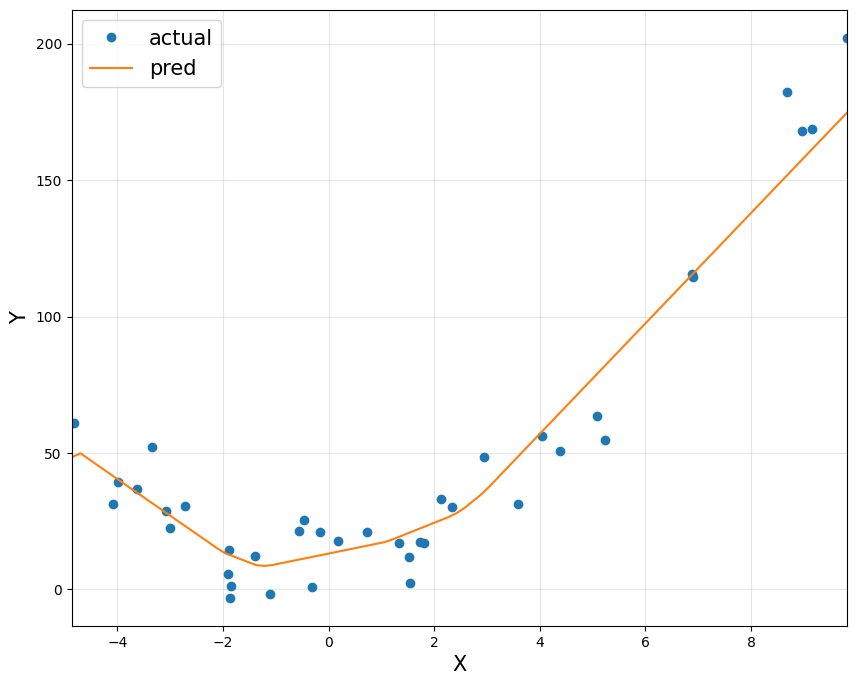

In [35]:
plt.figure(figsize = (10, 8))

plt.xlabel('X', fontsize = 15)
plt.ylabel('Y', fontsize = 15)
plt.plot(x_test, y_test, 'o', label = 'actual')
xx = np.linspace(0, 1, 100).reshape(-1, 1)
plt.plot(xx*15 - 5, model2.predict(xx) * 200, label = 'pred')
plt.xlim([np.min(x_test), np.max(x_test)])
plt.grid(alpha = 0.3)
plt.legend(fontsize = 15)

plt.show()

In [42]:
model3 = Sequential()

model3.add(Flatten(input_shape=(1,)))
model3.add(Dense(256, activation = LeakyReLU(alpha=0.01)))
model3.add(Dense(256, activation = LeakyReLU(alpha=0.01)))
model3.add(Dense(256, activation = LeakyReLU(alpha=0.01)))
model3.add(Dense(256, activation = LeakyReLU(alpha=0.01)))
model3.add(Dense(256, activation = LeakyReLU(alpha=0.01)))
model3.add(Dense(256, activation = LeakyReLU(alpha=0.01)))
model3.add(Dense(256, activation = LeakyReLU(alpha=0.01)))
model3.add(Dense(256, activation = LeakyReLU(alpha=0.01)))
model3.add(Dense(256, activation = LeakyReLU(alpha=0.01)))
model3.add(Dense(256, activation = LeakyReLU(alpha=0.01)))
model3.add(Dense(1, activation = 'linear'))

In [43]:
model3.compile(optimizer = Adam(learning_rate=1e-3), loss = 'mse')
model3.summary()

Model: "sequential_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_7 (Flatten)             │ (None, 1)              │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_37 (Dense)                │ (None, 256)            │           512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_38 (Dense)                │ (None, 256)            │        65,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_39 (Dense)                │ (None, 256)            │        65,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_40 (Dense)                │ (None, 256)            │        65,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_41 (Dense)                │ (None, 256)            │        65,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_42 (Dense)                │ (None, 256)            │        65,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_43 (Dense)                │ (None, 256)            │        65,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_44 (Dense)                │ (None, 256)            │        65,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_45 (Dense)                │ (None, 256)            │        65,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_46 (Dense)                │ (None, 256)            │        65,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_47 (Dense)                │ (None, 1)              │           257 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 592,897 (2.26 MB)

 Trainable params: 592,897 (2.26 MB)

 Non-trainable params: 0 (0.00 B)

In [44]:
history3 = model3.fit(x_train, y_train, batch_size = 20, epochs= 200, verbose = 1)

Epoch 1/200
8/8 ━━━━━━━━━━━━━━━━━━━━ 4s 13ms/step - loss: 0.1474
Epoch 2/200
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0652
Epoch 3/200
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0433
Epoch 4/200
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0259
Epoch 5/200
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0166
Epoch 6/200
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0049
Epoch 7/200
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 0.0069
Epoch 8/200
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 0.0072
Epoch 9/200
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0052
Epoch 10/200
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0044
Epoch 11/200
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0052
Epoch 12/200
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 0.0045
Epoch 13/200
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0044
Epoch 14/200
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0035
Epoch 15/200
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0029
Epoch 16/200
8/8 ━━

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step


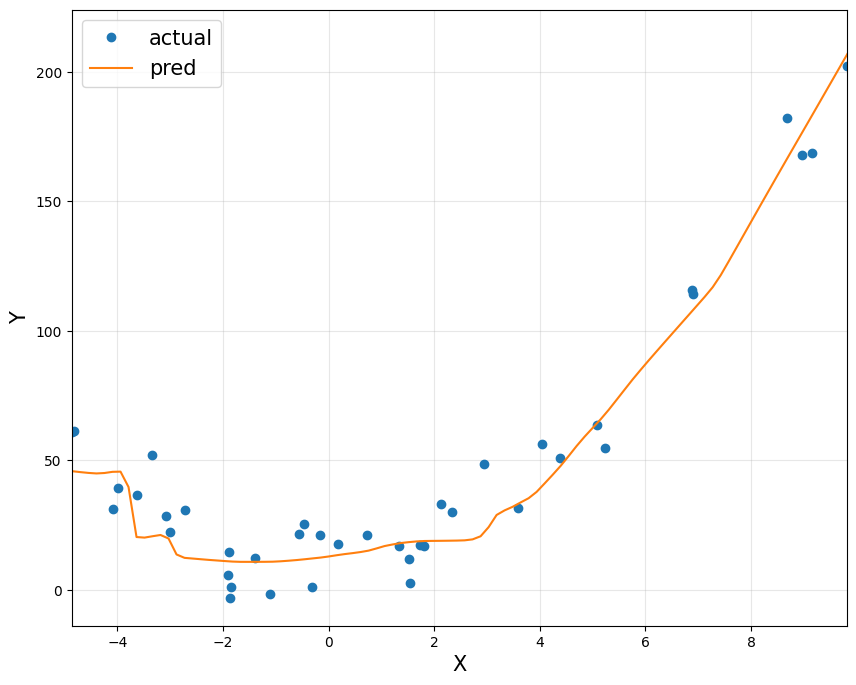

In [45]:
plt.figure(figsize = (10, 8))

plt.xlabel('X', fontsize = 15)
plt.ylabel('Y', fontsize = 15)
plt.plot(x_test, y_test, 'o', label = 'actual')
xx = np.linspace(0, 1, 100).reshape(-1, 1)
plt.plot(xx*15 - 5, model3.predict(xx) * 200, label = 'pred')
plt.xlim([np.min(x_test), np.max(x_test)])
plt.grid(alpha = 0.3)
plt.legend(fontsize = 15)

plt.show()